# Social Network Analysis - Exercise Sheet 5b)


### Multi-Relational Networks (MRGraphs)

In this task, you will work with MRGraphs, compositions of relations and their underlying algebraic structure. You will test and demonstrate your implementations on real world data. For the different tasks below, you can or several data sets, if this makes it easier to demonstrate your implementations.

#### Guidelines
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 26.01.2023 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library for your graphs.

##### Exercise:
1. Think of how MRGraph can be implemented. You can use networkx or implement your own.
2. Think of some example real world MRGraph with three different relations and implement it (load it into the jupyter notebook).
3. Provide or implement some visualization for your MultiGraph.
4. Implement structural equivalence for MRGraphs. Apply this to your graph. What does this show you?
5. Implement the graph composition (compound relation) of two relations. Your implementation should be able to compose  arbitrarily many further relations.
6. Apply the composition to some example in your graph. What are your findings?
6. Implement the Construction Algorithm for MRG induced Semigroups and apply it to your data. Why is this useful?

In [362]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

1. Think of how MRGraph can be implemented. You can use networkx or implement your own.

I use the networkx library which implements the MRGraph and MRDiGraphs. 
The MRGraph is a MultiGraph, which is a graph with multiple edges possible between two nodes. 
(MRDiGraph is a directed graph; analog to MRGraph.)

I use the weight attribute (and give it another name) of the edges to store to which edge set a edge belongs.
Hence, one can have multiple edges between two nodes, but they belong to different edge sets.
The weight attribute can be used to filter the edges by edge set.

Networkx also implements functionalities to display the edge relations (eg. adj).

2. real world MRGraph with three different relations.

People I see in the context of university at different days of the week.

In [363]:
import itertools

# build graph

students = ['Marco', 'Lukas', 'Daniel', 'Klara', 'Ben', 'Henry', 'Aleyna']
professors = ['Prof. Stumme', 'Prof. Sick']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

MG = nx.MultiDiGraph()

# monday
for student_pair in itertools.permutations(students[-4:], 2):
    MG.add_edge(*student_pair, key=days[0])
for student in students[-4:]:
    MG.add_edge(professors[1], student, key=days[0])  

# tuesday
for student_pair in itertools.permutations(students, 2):
    MG.add_edge(*student_pair, key=days[1])
for student in students[-4:]:
    MG.add_edge(professors[1], student, key=days[1]) 
for student in students[:3]:
    MG.add_edge(professors[0], student, key=days[1]) 

# wednesday
for student_pair in itertools.permutations(students, 2):
    MG.add_edge(*student_pair, key=days[2])
for student in students[-4:]:
    MG.add_edge(professors[1], student, key=days[2]) 
for student in students[:3]:
    MG.add_edge(professors[0], student, key=days[2]) 

# thursday
for student_pair in itertools.permutations(students[:3], 2):
    MG.add_edge(*student_pair, key=days[3])
for student in students[:3]:
    MG.add_edge(professors[0], student, key=days[3])  

# friday
friday_students = [students[i] for i in  range(1,len(students),2)]
for student_pair in itertools.permutations(friday_students, 2):
    MG.add_edge(*student_pair, key=days[4])

In [364]:
print(MG.adj)
print(MG.get_edge_data('Klara','Ben'))
print(MG.get_edge_data('Daniel','Aleyna'))

{'Klara': {'Ben': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Henry': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}, 'Friday': {}}, 'Aleyna': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Marco': {'Tuesday': {}, 'Wednesday': {}}, 'Lukas': {'Tuesday': {}, 'Wednesday': {}, 'Friday': {}}, 'Daniel': {'Tuesday': {}, 'Wednesday': {}}}, 'Ben': {'Klara': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Henry': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Aleyna': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Marco': {'Tuesday': {}, 'Wednesday': {}}, 'Lukas': {'Tuesday': {}, 'Wednesday': {}}, 'Daniel': {'Tuesday': {}, 'Wednesday': {}}}, 'Henry': {'Klara': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}, 'Friday': {}}, 'Ben': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Aleyna': {'Monday': {}, 'Tuesday': {}, 'Wednesday': {}}, 'Marco': {'Tuesday': {}, 'Wednesday': {}}, 'Lukas': {'Tuesday': {}, 'Wednesday': {}, 'Friday': {}}, 'Daniel': {'Tuesday': {}, 'Wednesday': {}}}, 'Aleyna': 

3. visualization for your MultiGraph.

In [365]:
from numpy import linspace


def visualize_multigraphs(MG: nx.MultiGraph, edge_name_distiguisher: str = 'day', relation_names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']):
    pos = nx.random_layout(MG)
    nx.draw_networkx_nodes(MG, pos, node_color = 'b', node_size = 100, alpha = 1)

    colours = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

    colour_map = {day:colours[colour] for colour, day in enumerate(relation_names)}    #['g','b','r','y','orange', 'c', 'm', 'k']
    day_num = {day:num for num, day in enumerate(relation_names)}

    ax = plt.gca()
    # https://networkx.org/documentation/latest/auto_examples/drawing/plot_chess_masters.html#sphx-glr-auto-examples-drawing-plot-chess-masters-py
    label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
    nx.draw_networkx_labels(MG, pos, font_size=8, bbox=label_options)
    # https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz
    for e in MG.edges(data=True, keys=True):
        start = pos[e[1]]   # (x,y)
        end = pos[e[0]]    # (x,y)
        day = e[2]
        ax.annotate('',#day,
                    xy=start, xycoords='data',
                    xytext=end, textcoords='data',
                    size=8,
                    arrowprops=dict(arrowstyle="->", color=colour_map[day],
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    alpha=0.6,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*day_num[day])
                                    ),
                                    ),
                    )
    plt.axis('off')
    for day in relation_names:
        plt.scatter([],[], c=colour_map[day], label=day)
 
    plt.legend()

    plt.show()

In [366]:
visualize_multigraphs(MG, edge_name_distiguisher= 'day')

KeyboardInterrupt: 

4. Structural equivalence

In [ ]:
import numpy as np

def get_relation_names(graph):
    '''
    :param graph: a networkx MRgraph
    
    :return: a set of all relation names in graph
    '''
    return set(np.array([[*edge] for edge in list(graph.edges)])[:,2])

def neighbours_per_relation(graph, v):
    '''
    :param graph: a networkx MRgraph
    :param v: a node in graph
    
    :return: a dictionary with relation names as keys and a set of neighbours of v for each relation as values
    '''
    adj = graph.adj
    neighbour_per_relation = {}
    for neighbour in adj[v]:
        relation_names = adj[v][neighbour]
        for relation_name in relation_names:
            neighbour_per_relation.setdefault(relation_name, {neighbour})
            neighbour_per_relation[relation_name].add(neighbour)


    return neighbour_per_relation

def check_structural_equivalence(graph, v, w):
    '''
    :param graph: a networkx MRgraph
    :param v: a node in graph
    :param w: a node in graph
    
    :return: True if v and w are structurally equivalent (Def. 9.10), False otherwise
    '''
    adj = graph.adj
    relation_names = get_relation_names(graph)
    v_relations = neighbours_per_relation(graph, v)
    w_relations = neighbours_per_relation(graph, w)
    for relation_name in relation_names:
        if ((relation_name in v_relations.keys()) and (relation_name in w_relations.keys())) and (v_relations[relation_name] != w_relations[relation_name]):
            print(relation_name, ': ', v, v_relations[relation_name], ', ', w, w_relations[relation_name])
            return False
        elif ((relation_name in v_relations.keys()) or (relation_name in w_relations.keys())):
            print('one node is incident to an edge of ', relation_name, ' but the other is not')
            return False
    return True

In [ ]:
for student_pair in itertools.permutations(students, 2):
    print('\n---Structural equivalence between ', student_pair)
    check_structural_equivalence(MG, *student_pair)


---Structural equivalence between  ('Marco', 'Lukas')
Thursday :  Marco {'Daniel', 'Lukas'} ,  Lukas {'Marco', 'Daniel'}

---Structural equivalence between  ('Marco', 'Daniel')
Thursday :  Marco {'Daniel', 'Lukas'} ,  Daniel {'Marco', 'Lukas'}

---Structural equivalence between  ('Marco', 'Klara')
one node is incident to an edge of  Monday  but the other is not

---Structural equivalence between  ('Marco', 'Ben')
one node is incident to an edge of  Monday  but the other is not

---Structural equivalence between  ('Marco', 'Henry')
one node is incident to an edge of  Monday  but the other is not

---Structural equivalence between  ('Marco', 'Aleyna')
one node is incident to an edge of  Monday  but the other is not

---Structural equivalence between  ('Lukas', 'Marco')
Thursday :  Lukas {'Marco', 'Daniel'} ,  Marco {'Daniel', 'Lukas'}

---Structural equivalence between  ('Lukas', 'Daniel')
Thursday :  Lukas {'Marco', 'Daniel'} ,  Daniel {'Marco', 'Lukas'}

---Structural equivalence betw

5. Graph composition of two relations

The user should take care that the composition is correct in terms of temporal order.

In [ ]:
def get_relationname_edges(graph, relation_name):
    pass
    
    
def transitive_closure(reachable_nodes1, reachable_nodes2):
    trans_reachable = dict()
    for key in reachable_nodes1.keys():
        neighbours = reachable_nodes1[key]
        trans_reachable[key] = []
        for end in neighbours:
            if ((end in reachable_nodes2.keys()) and (reachable_nodes2[end] != [])):
                trans_reachable[key].extend(reachable_nodes2[end])
    return trans_reachable

def get_reachable_nodes(graph, relation_name):
    all_edges = list(graph.edges(keys=True, data=False))
    relations = [[*edge[:2]] for edge in all_edges if [*edge][2] == relation_name]
    reachable_nodes = dict()
    for node in graph.nodes:
        reachable_nodes[node] = []
        for relation in relations:
            if node == relation[0]:
                reachable_nodes[node].append(relation[1])
    return reachable_nodes


def compound_relation(graph, relation_name1, relation_name2, new_graph:bool = False):
    # (u,v) in R1 and (v,w) in R2 => (u,w) in R2 o R1 = R2(R1(u))

    print('Compound relation ', relation_name2, ' o ', relation_name1, ' = ', relation_name2, '(', relation_name1, '(x))')
    assert relation_name1 in get_relation_names(graph), f'{relation_name1} not in graph'
    assert relation_name2 in get_relation_names(graph), f'{relation_name2} not in graph'
 
    reachable_nodes1 = get_reachable_nodes(graph, relation_name1)
    #print(reachable_nodes1)
    reachable_nodes2 = get_reachable_nodes(graph, relation_name2)
    #print(reachable_nodes2)

    transitive_closure_realtions = transitive_closure(reachable_nodes1, reachable_nodes2)
    #print('----transitive_closure: ', transitive_closure_realtions)

    transitive_graph = nx.MultiDiGraph()
    if not new_graph:
        transitive_graph = graph
    for key in transitive_closure_realtions.keys():
        for value in transitive_closure_realtions[key]:
            transitive_graph.add_edge(key, value, key=f'{relation_name2}({relation_name1})')
    return transitive_graph

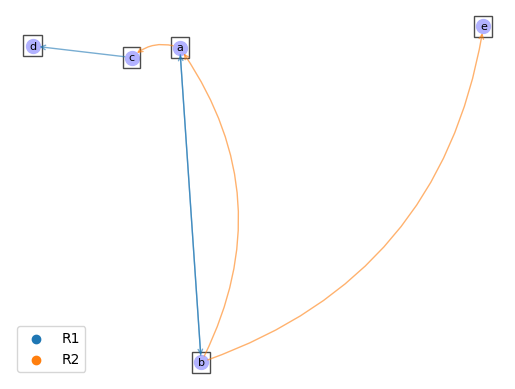

Compound relation  R2  o  R1  =  R2 ( R1 (x))
Compound relation  R2  o  R1  =  R2 ( R1 (x))


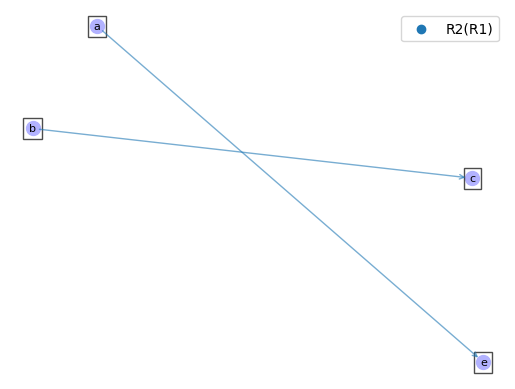

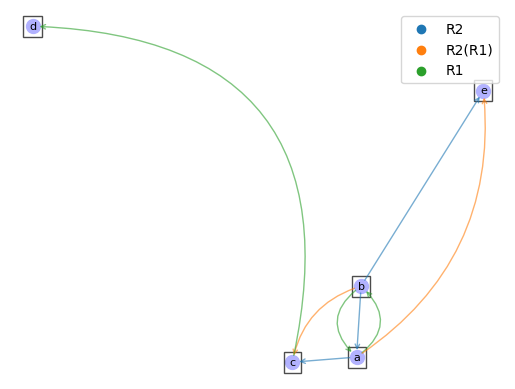

Compound relation  R1  o  R2(R1)  =  R1 ( R2(R1) (x))


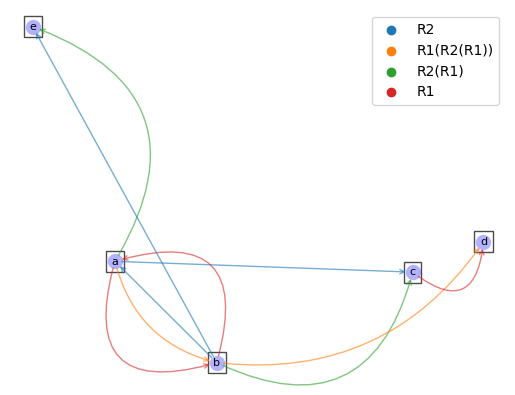

In [ ]:
small_test_case = nx.MultiDiGraph()
small_test_case.add_edge('a', 'b', key='R1')
small_test_case.add_edge('b', 'a', key='R1')
small_test_case.add_edge('b', 'a', key='R2')
small_test_case.add_edge('b', 'e', key='R2')
small_test_case.add_edge('a', 'c', key='R2')
small_test_case.add_edge('c', 'd', key='R1')
#print(small_test_case.adj)

visualize_multigraphs(small_test_case, edge_name_distiguisher= 'day', relation_names=['R1', 'R2'])

transitive_closure_graph = compound_relation(small_test_case, 'R1', 'R2', new_graph=True)
small_test_case = compound_relation(small_test_case, 'R1', 'R2', new_graph=False)
#print(transitive_closure_graph.adj)

visualize_multigraphs(transitive_closure_graph, edge_name_distiguisher= 'day', relation_names=get_relation_names(transitive_closure_graph))
visualize_multigraphs(small_test_case, edge_name_distiguisher= 'day', relation_names=get_relation_names(small_test_case))
# TODO/ FIXME: reflexive edges missing

# abritary many compound relations
relation1 = f'R2(R1)'
relation2 = 'R1'
small_test_case = compound_relation(small_test_case, relation1, relation2, new_graph=False)
visualize_multigraphs(small_test_case, edge_name_distiguisher= 'day', relation_names=get_relation_names(small_test_case))   # is correct if reflexive edges are added


Compound relation  Tuesday  o  Monday  =  Tuesday ( Monday (x))


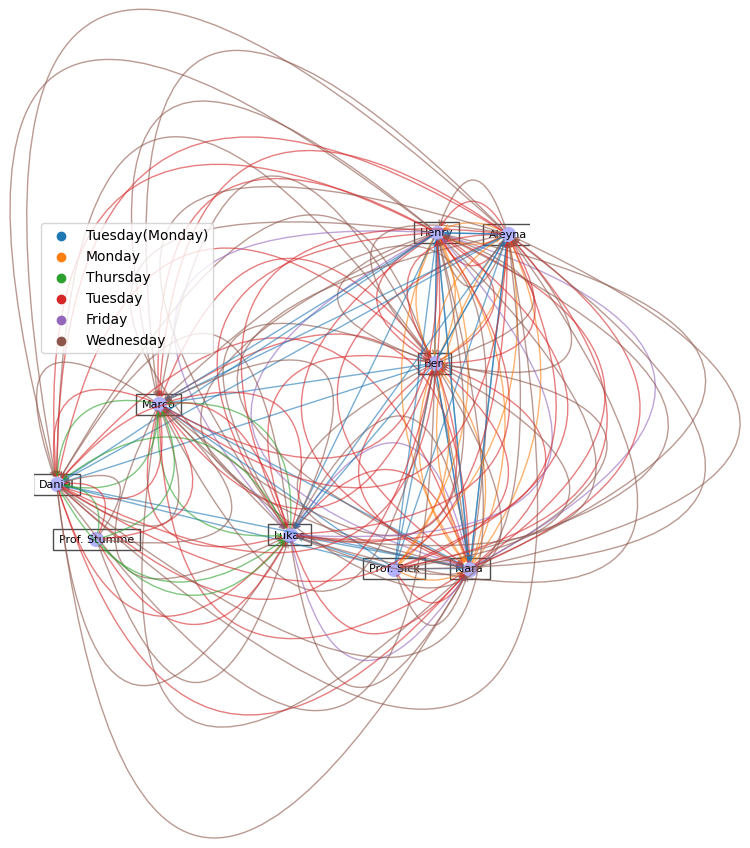

In [ ]:
relation1 = 'Monday'
relation2 = 'Tuesday'
uni_transitive_closure_graph = compound_relation(MG, relation1, relation2, new_graph=False)
visualize_multigraphs(uni_transitive_closure_graph, edge_name_distiguisher= 'day', relation_names=get_relation_names(uni_transitive_closure_graph))

abtriatry many further relations:

Compound relation  Wednesday  o  Tuesday(Monday)  =  Wednesday ( Tuesday(Monday) (x))


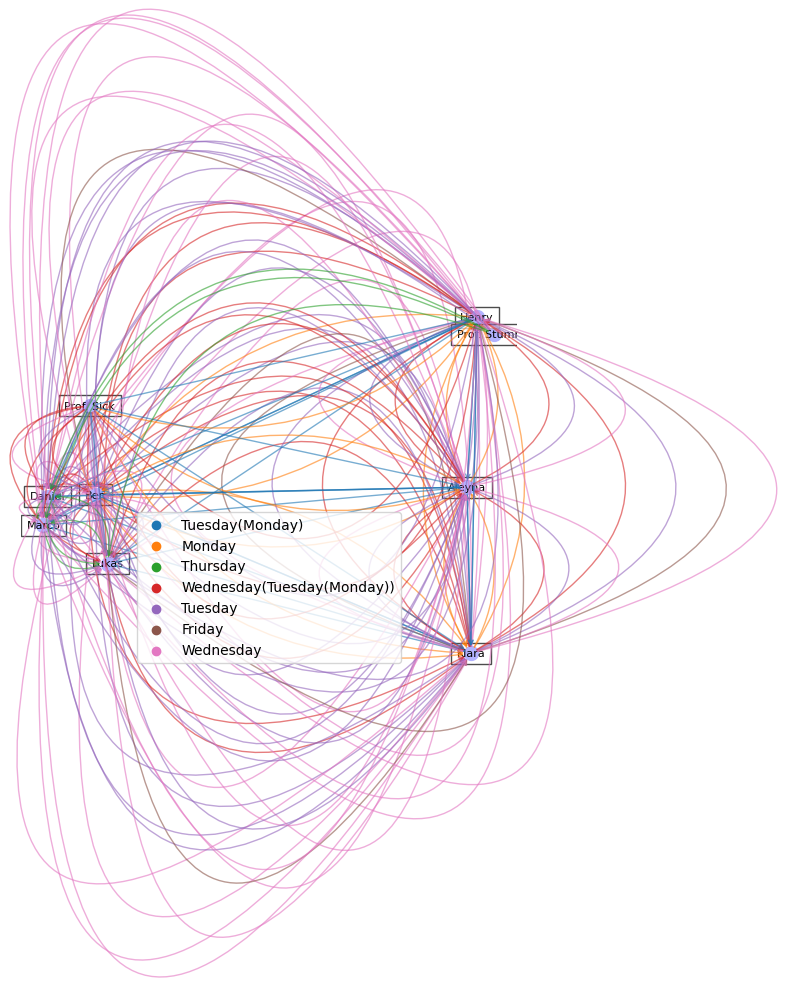

In [ ]:
relation1 = f'{relation2}({relation1})'
relation2 = 'Wednesday'
uni_transitive_closure_graph = compound_relation(uni_transitive_closure_graph, relation1, relation2, new_graph=False)
visualize_multigraphs(uni_transitive_closure_graph, edge_name_distiguisher= 'day', relation_names=get_relation_names(uni_transitive_closure_graph))

5. Apply the composition to some example in your graph. What are your findings?

- reflexive edges are not displayed in the graph, which makes checking the composition difficult.
- difficult to read for dense graphs

6. Construction Algorithm for MRG induced Semigroups
- VL 11, slide 14

In [ ]:
from itertools import product


def check_whether_new_relation(graph, relation_name):
    '''
    :param graph: a networkx MRgraph
    :param relation_name: a relation name
    
    :return: True if relation_name is a new relation, False otherwise
    '''
    relation_names = get_relation_names(graph)
    all_edges = list(graph.edges(keys=True, data=False))
    new_relations = [[*edge[:2]] for edge in all_edges if [*edge][2] == relation_name]

    for old_relation in relation_names:
        if old_relation == relation_name:
            continue
        else:
            old_relations = [[*edge[:2]] for edge in all_edges if [*edge][2] == old_relation]
            if old_relations == new_relations:
                return False
    return True

def construct_MRG_induced_semigroups(graph):
    '''
    :param graph: a networkx MRgraph
    
    :return: a list of semigroups induced by graph
    '''
    relation_names = get_relation_names(graph)
    
    
    # init: W_1 = Eps
    w_i = relation_names
    w_new = True
    trans_graph = graph

    # incrementally compute W_{i+1}
    while w_new:
        w_new = False
        unique_combinations = list(list(zip(w_i, original_relation))
                           for original_relation in product(relation_names, repeat = len(relation_names)))
        print(unique_combinations)
        for combination in unique_combinations:
            d = combination[0]
            e = combination[1]
            new_relation_name = f'{d}({e})'
            trans_graph = compound_relation(trans_graph, e, d, new_graph=False)

            if check_whether_new_relation(trans_graph, new_relation_name):
                w_new = True

    return trans_graph

In [ ]:
small_test_case = nx.MultiDiGraph()
small_test_case.add_edge('a', 'b', key='R1')
small_test_case.add_edge('b', 'a', key='R2')
small_test_case.add_edge('b', 'd', key='R2')
small_test_case.add_edge('a', 'c', key='R2')
small_test_case.add_edge('c', 'd', key='R1')

semigroup_graph = construct_MRG_induced_semigroups(small_test_case)

In [ ]:
visualize_multigraphs(semigroup_graph, edge_name_distiguisher= 'day', relation_names=get_relation_names(semigroup_graph))